In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\vdio2.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
print(ret)
print(old_frame)

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type


In [ ]:
import cv2
import numpy as np

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a),int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    # 计算并记录标记点之间的距离变化
    if initial_distances is None:
        initial_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            initial_distances.append(dist)
    else:
        current_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            current_distances.append(dist)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
import matplotlib.pyplot as plt

# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np

# 读取视频
cap = cv2.VideoCapture(r'D:\work\python\clone\2d\ultralnew\ultralytics\dataset\32mm coupler steel bar tensile strength testing.mp4')

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    # 计算并记录标记点之间的距离变化
    if initial_distances is None:
        initial_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            initial_distances.append(dist)
    else:
        current_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            current_distances.append(dist)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
import matplotlib.pyplot as plt

# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

# 用于拟合钢筋轴线的点集
points_for_line_fit = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果并收集用于拟合的点
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        points_for_line_fit.append([a, b])
    
    img = cv2.add(frame, mask)

    # 拟合钢筋轴线
    if len(points_for_line_fit) >= 2:
        [vx, vy, x, y] = cv2.fitLine(np.array(points_for_line_fit, dtype=np.float32), cv2.DIST_L2, 0, 0.01, 0.01)
        lefty = int((-x * vy / vx) + y)
        righty = int(((frame.shape[1] - x) * vy / vx) + y)
        img = cv2.line(img, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)

    # 放置并跟踪虚拟标距点
    num_markers = 10
    if initial_distances is None:
        # 在轴线上均匀放置标距点
        initial_distances = []
        markers = []
        for i in range(num_markers):
            marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
            marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
            img = cv2.circle(img, (marker_x, marker_y), 5, (0, 0, 255), -1)
    else:
        current_distances = []
        for i in range(len(markers) - 1):
            marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
            marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
            current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
            img = cv2.circle(img, (marker_x, marker_y), 5, (0, 0, 255), -1)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    cv2.imshow('frame', img)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_video(video_path):
    """
    读取视频文件。

    参数:
        video_path (str): 视频文件路径。

    返回:
        cap (cv2.VideoCapture): 视频捕获对象。
    """
    return cv2.VideoCapture(video_path)

def detect_initial_features(frame_gray, feature_params):
    """
    在初始帧中检测特征点。

    参数:
        frame_gray (numpy.ndarray): 灰度图像。
        feature_params (dict): Shi-Tomasi角点检测参数。

    返回:
        p0 (numpy.ndarray): 检测到的特征点。
    """
    return cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)

def track_features(old_gray, frame_gray, p0, lk_params):
    """
    在新帧中跟踪特征点。

    参数:
        old_gray (numpy.ndarray): 上一帧的灰度图像。
        frame_gray (numpy.ndarray): 当前帧的灰度图像。
        p0 (numpy.ndarray): 上一帧的特征点。
        lk_params (dict): Lucas-Kanade光流法参数。

    返回:
        p1 (numpy.ndarray): 当前帧的特征点。
        st (numpy.ndarray): 状态向量，表示每个特征点的跟踪状态。
    """
    p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    return p1, st

def draw_tracking(frame, good_old, good_new, color):
    """
    绘制特征点的跟踪结果。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        good_old (numpy.ndarray): 上一帧的特征点。
        good_new (numpy.ndarray): 当前帧的特征点。
        color (numpy.ndarray): 颜色数组。

    返回:
        frame (numpy.ndarray): 绘制了跟踪结果的图像。
        mask (numpy.ndarray): 掩膜图像。
    """
    mask = np.zeros_like(frame)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    return frame, mask

def fit_line(points):
    """
    拟合钢筋轴线。

    参数:
        points (list): 用于拟合的点集。

    返回:
        line_params (tuple): 拟合线的参数。
    """
    [vx, vy, x, y] = cv2.fitLine(np.array(points, dtype=np.float32), cv2.DIST_L2, 0, 0.01, 0.01)
    return vx, vy, x, y

def draw_fitted_line(frame, vx, vy, x, y):
    """
    在图像上绘制拟合的钢筋轴线。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。

    返回:
        frame (numpy.ndarray): 绘制了轴线的图像。
    """
    lefty = int((-x * vy / vx) + y)
    righty = int(((frame.shape[1] - x) * vy / vx) + y)
    frame = cv2.line(frame, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)
    return frame

def place_and_track_markers(num_markers, frame, vx, vy, x, y, initial_distances, markers):
    """
    放置并跟踪虚拟标距点。

    参数:
        num_markers (int): 标距点的数量。
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。
        initial_distances (list): 初始标距点的距离。
        markers (list): 标距点的坐标。

    返回:
        frame (numpy.ndarray): 绘制了标距点的图像。
        initial_distances (list): 更新后的初始距离。
        current_distances (list): 当前标距点的距离。
    """
    current_distances = []
    for i in range(num_markers):
        marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
        marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
        if initial_distances is None:
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
        else:
            current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
        frame = cv2.circle(frame, (marker_x, marker_y), 5, (0, 0, 255), -1)
    return frame, initial_distances, current_distances

def calculate_strain(current_distances, initial_distances):
    """
    计算应变。

    参数:
        current_distances (list): 当前标距点的距离。
        initial_distances (list): 初始标距点的距离。

    返回:
        strain (list): 应变值。
    """
    strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
    return strain

def plot_strain(strain_data):
    """
    绘制应变变化曲线。

    参数:
        strain_data (list): 各帧的应变数据。
    """
    for i, strain in enumerate(zip(*strain_data)):
        plt.plot(strain, label=f'Segment {i + 1}')
    plt.xlabel('Frame')
    plt.ylabel('Strain')
    plt.title('Strain over Time')
    plt.legend()
    plt.show()

def main(video_path):
    """
    主函数，执行视频处理流程。

    参数:
        video_path (str): 视频文件路径。
    """
    # 读取视频
    cap = read_video(video_path)

    # Shi-Tomasi角点检测参数
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade光流法参数
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # 随机颜色用于绘制
    color = np.random.randint(0, 255, (100, 3))

    # 读取第一帧
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = detect_initial_features(old_gray, feature_params)

    # 创建掩膜图像用于绘制
    mask = np.zeros_like(old_frame)

    # 初始化变量用于记录标记点距离变化
    initial_distances = []
    strain_data = []

    # 用于拟合钢筋轴线的点集
    points_for_line_fit = []
    markers = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 计算光流
        p1, st = track_features(old_gray, frame_gray, p0, lk_params)

        # 选择好的跟踪点
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # 绘制跟踪结果并收集用于拟合的点
        frame, mask = draw_tracking(frame, good_old, good_new, color)
        points_for_line_fit.extend(good_new)

        # 拟合钢筋轴线
        if len(points_for_line_fit) >= 2:
            vx, vy, x, y = fit_line(points_for_line_fit)
            frame = draw_fitted_line(frame, vx, vy, x, y)

            # 放置并跟踪虚拟标距点
            frame, initial_distances, current_distances = place_and_track_markers(10, frame, vx, vy, x, y, initial_distances, markers)

            if current_distances:
                strain = calculate_strain(current_distances, initial_distances)
                strain_data.append(strain)
                print(f"Strain at frame {len(strain_data)}: {strain}")

        cv2.imshow('frame', frame)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        # 更新旧帧和旧点
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cap.release()
    cv2.destroyAllWindows()

    # 绘制应变变化曲线
    plot_strain(strain_data)

# 调用主函数
if __name__ == "__main__":
    video_path = r'F:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4'  # 这里填写你的视频文件路径
    main(video_path)


C:\Users\Liminghui\AppData\Local\Temp\ipykernel_22432\944425620.py:96: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x * vy / vx) + y)
C:\Users\Liminghui\AppData\Local\Temp\ipykernel_22432\944425620.py:97: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((frame.shape[1] - x) * vy / vx) + y)
C:\Users\Liminghui\AppData\Local\Temp\ipykernel_22432\944425620.py:122: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker_x = int(x + i * vx * (frame

IndexError: list index out of range

Strain at frame 1: []
Strain at frame 2: []
Strain at frame 3: []
Strain at frame 4: []
Strain at frame 5: []
Strain at frame 6: []
Strain at frame 7: []
Strain at frame 8: []
Strain at frame 9: []
Strain at frame 10: []
Strain at frame 11: []
Strain at frame 12: []
Strain at frame 13: []
Strain at frame 14: []
Strain at frame 15: []
Strain at frame 16: []
Strain at frame 17: []
Strain at frame 18: []
Strain at frame 19: []
Strain at frame 20: []
Strain at frame 21: []
Strain at frame 22: []
Strain at frame 23: []
Strain at frame 24: []
Strain at frame 25: []
Strain at frame 26: []
Strain at frame 27: []
Strain at frame 28: []
Strain at frame 29: []
Strain at frame 30: []
Strain at frame 31: []
Strain at frame 32: []
Strain at frame 33: []
Strain at frame 34: []
Strain at frame 35: []
Strain at frame 36: []
Strain at frame 37: []
Strain at frame 38: []
Strain at frame 39: []
Strain at frame 40: []
Strain at frame 41: []
Strain at frame 42: []
Strain at frame 43: []
Strain at frame 44: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Strain at frame 388: []


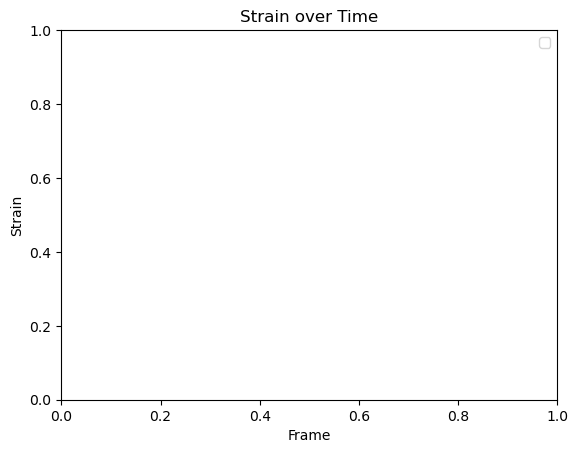

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

def read_video(video_path):
    """
    读取视频文件。

    参数:
        video_path (str): 视频文件路径。

    返回:
        cap (cv2.VideoCapture): 视频捕获对象。
    """
    return cv2.VideoCapture(video_path)

def detect_initial_features(frame_gray, feature_params):
    """
    在初始帧中检测特征点。

    参数:
        frame_gray (numpy.ndarray): 灰度图像。
        feature_params (dict): Shi-Tomasi角点检测参数。

    返回:
        p0 (numpy.ndarray): 检测到的特征点。
    """
    return cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)

def track_features(old_gray, frame_gray, p0, lk_params):
    """
    在新帧中跟踪特征点。

    参数:
        old_gray (numpy.ndarray): 上一帧的灰度图像。
        frame_gray (numpy.ndarray): 当前帧的灰度图像。
        p0 (numpy.ndarray): 上一帧的特征点。
        lk_params (dict): Lucas-Kanade光流法参数。

    返回:
        p1 (numpy.ndarray): 当前帧的特征点。
        st (numpy.ndarray): 状态向量，表示每个特征点的跟踪状态。
    """
    p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    return p1, st

def draw_tracking(frame, good_old, good_new, color):
    """
    绘制特征点的跟踪结果。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        good_old (numpy.ndarray): 上一帧的特征点。
        good_new (numpy.ndarray): 当前帧的特征点。
        color (numpy.ndarray): 颜色数组。

    返回:
        frame (numpy.ndarray): 绘制了跟踪结果的图像。
        mask (numpy.ndarray): 掩膜图像。
    """
    mask = np.zeros_like(frame)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    return frame, mask

def fit_line_ransac(points):
    """
    使用RANSAC拟合钢筋轴线，并添加接近水平或垂直的限制。

    参数:
        points (list): 用于拟合的点集。

    返回:
        line_params (tuple): 拟合线的参数。
    """
    X = np.array([p[0] for p in points]).reshape(-1, 1)
    y = np.array([p[1] for p in points])
    ransac = RANSACRegressor()
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_

    vx = 1
    vy = ransac.estimator_.coef_[0]
    x = np.mean(X[inlier_mask])
    y = np.mean(y[inlier_mask])

    # 限制拟合线接近水平或垂直
    if abs(vy) < 0.5:  # 接近水平
        vy = 0
    elif abs(vy) > 2:  # 接近垂直
        vy = np.sign(vy) * 10

    return vx, vy, x, y

def draw_fitted_line(frame, vx, vy, x, y):
    """
    在图像上绘制拟合的钢筋轴线。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。

    返回:
        frame (numpy.ndarray): 绘制了轴线的图像。
    """
    lefty = int((-x * vy / vx) + y)
    righty = int(((frame.shape[1] - x) * vy / vx) + y)
    frame = cv2.line(frame, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)
    return frame

def place_and_track_markers(num_markers, frame, vx, vy, x, y, initial_distances, markers):
    """
    放置并跟踪虚拟标距点。

    参数:
        num_markers (int): 标距点的数量。
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。
        initial_distances (list): 初始标距点的距离。
        markers (list): 标距点的坐标。

    返回:
        frame (numpy.ndarray): 绘制了标距点的图像。
        initial_distances (list): 更新后的初始距离。
        current_distances (list): 当前标距点的距离。
    """
    current_distances = []
    for i in range(num_markers):
        marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
        marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
        if initial_distances is None:
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
        else:
            if i < len(markers):
                current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
            else:
                markers.append((marker_x, marker_y))
        frame = cv2.circle(frame, (marker_x, marker_y), 5, (0, 0, 255), -1)
    return frame, initial_distances, current_distances

def calculate_strain(current_distances, initial_distances):
    """
    计算应变。

    参数:
        current_distances (list): 当前标距点的距离。
        initial_distances (list): 初始标距点的距离。

    返回:
        strain (list): 应变值。
    """
    strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
    return strain

def plot_strain(strain_data):
    """
    绘制应变变化曲线。

    参数:
        strain_data (list): 各帧的应变数据。
    """
    for i, strain in enumerate(zip(*strain_data)):
        plt.plot(strain, label=f'Segment {i + 1}')
    plt.xlabel('Frame')
    plt.ylabel('Strain')
    plt.title('Strain over Time')
    plt.legend()
    plt.show()

def main(video_path):
    """
    主函数，执行视频处理流程。

    参数:
        video_path (str): 视频文件路径。
    """
    # 读取视频
    cap = read_video(video_path)

    # Shi-Tomasi角点检测参数
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade光流法参数
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # 随机颜色用于绘制
    color = np.random.randint(0, 255, (100, 3))

    # 读取第一帧
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = detect_initial_features(old_gray, feature_params)

    # 创建掩膜图像用于绘制
    mask = np.zeros_like(old_frame)

    # 初始化变量用于记录标记点距离变化
    initial_distances = []
    strain_data = []
    markers = []

    # 用于RANSAC拟合的点
    points_for_line_fit = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 跟踪特征点
        p1, st = track_features(old_gray, frame_gray, p0, lk_params)

        # 选择跟踪成功的点
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # 绘制跟踪结果
        frame, mask = draw_tracking(frame, good_old, good_new, color)
        points_for_line_fit.extend(good_new)

        # 拟合钢筋轴线
        if len(points_for_line_fit) >= 2:
            vx, vy, x, y = fit_line_ransac(points_for_line_fit)
            frame = draw_fitted_line(frame, vx, vy, x, y)

            # 放置并跟踪虚拟标距点
            frame, initial_distances, current_distances = place_and_track_markers(10, frame, vx, vy, x, y, initial_distances, markers)

            if current_distances:
                strain = calculate_strain(current_distances, initial_distances)
                strain_data.append(strain)
                print(f"Strain at frame {len(strain_data)}: {strain}")

        cv2.imshow('frame', frame)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        # 更新旧帧和旧点
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cap.release()
    cv2.destroyAllWindows()

    # 绘制应变变化曲线
    plot_strain(strain_data)

# 调用主函数
if __name__ == "__main__":
    video_path = r"F:\work\python\clone\2d\ultralnew\ultralytics\dataset\How to use Video Extensometer.mp4"  # 这里填写你的视频文件路径
    main(video_path)


加入手动ROI

Strain at frame 1: []
Strain at frame 2: []
Strain at frame 3: []
Strain at frame 4: []
Strain at frame 5: []
Strain at frame 6: []
Strain at frame 7: []
Strain at frame 8: []
Strain at frame 9: []
Strain at frame 10: []
Strain at frame 11: []
Strain at frame 12: []
Strain at frame 13: []
Strain at frame 14: []
Strain at frame 15: []
Strain at frame 16: []
Strain at frame 17: []
Strain at frame 18: []
Strain at frame 19: []
Strain at frame 20: []
Strain at frame 21: []
Strain at frame 22: []
Strain at frame 23: []
Strain at frame 24: []
Strain at frame 25: []
Strain at frame 26: []
Strain at frame 27: []
Strain at frame 28: []
Strain at frame 29: []
Strain at frame 30: []
Strain at frame 31: []
Strain at frame 32: []
Strain at frame 33: []
Strain at frame 34: []
Strain at frame 35: []
Strain at frame 36: []
Strain at frame 37: []
Strain at frame 38: []
Strain at frame 39: []
Strain at frame 40: []
Strain at frame 41: []
Strain at frame 42: []
Strain at frame 43: []
Strain at frame 44: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Strain at frame 1069: []
Strain at frame 1070: []
Strain at frame 1071: []


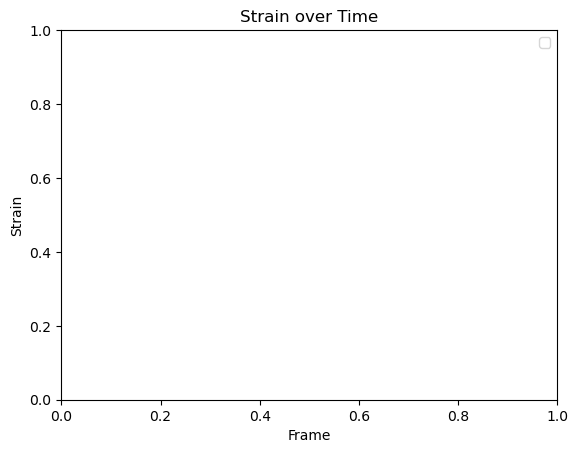

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor

def read_video(video_path):
    """
    读取视频文件。

    参数:
        video_path (str): 视频文件路径。

    返回:
        cap (cv2.VideoCapture): 视频捕获对象。
    """
    return cv2.VideoCapture(video_path)

def detect_initial_features(frame_gray, feature_params):
    """
    在初始帧中检测特征点。

    参数:
        frame_gray (numpy.ndarray): 灰度图像。
        feature_params (dict): Shi-Tomasi角点检测参数。

    返回:
        p0 (numpy.ndarray): 检测到的特征点。
    """
    return cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)

def track_features(old_gray, frame_gray, p0, lk_params):
    """
    在新帧中跟踪特征点。

    参数:
        old_gray (numpy.ndarray): 上一帧的灰度图像。
        frame_gray (numpy.ndarray): 当前帧的灰度图像。
        p0 (numpy.ndarray): 上一帧的特征点。
        lk_params (dict): Lucas-Kanade光流法参数。

    返回:
        p1 (numpy.ndarray): 当前帧的特征点。
        st (numpy.ndarray): 状态向量，表示每个特征点的跟踪状态。
    """
    p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    return p1, st

def draw_tracking(frame, good_old, good_new, color):
    """
    绘制特征点的跟踪结果。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        good_old (numpy.ndarray): 上一帧的特征点。
        good_new (numpy.ndarray): 当前帧的特征点。
        color (numpy.ndarray): 颜色数组。

    返回:
        frame (numpy.ndarray): 绘制了跟踪结果的图像。
        mask (numpy.ndarray): 掩膜图像。
    """
    mask = np.zeros_like(frame)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    return frame, mask

def fit_line_ransac(points):
    """
    使用RANSAC拟合钢筋轴线，并添加接近水平或垂直的限制。

    参数:
        points (list): 用于拟合的点集。

    返回:
        line_params (tuple): 拟合线的参数。
    """
    X = np.array([p[0] for p in points]).reshape(-1, 1)
    y = np.array([p[1] for p in points])
    ransac = RANSACRegressor()
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_

    vx = 1
    vy = ransac.estimator_.coef_[0]
    x = np.mean(X[inlier_mask])
    y = np.mean(y[inlier_mask])

    # 限制拟合线接近水平或垂直
    if abs(vy) < 0.5:  # 接近水平
        vy = 0
    elif abs(vy) > 2:  # 接近垂直
        vy = np.sign(vy) * 10

    return vx, vy, x, y

def draw_fitted_line(frame, vx, vy, x, y):
    """
    在图像上绘制拟合的钢筋轴线。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。

    返回:
        frame (numpy.ndarray): 绘制了轴线的图像。
    """
    lefty = int((-x * vy / vx) + y)
    righty = int(((frame.shape[1] - x) * vy / vx) + y)
    frame = cv2.line(frame, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)
    return frame

def place_and_track_markers(num_markers, frame, vx, vy, x, y, initial_distances, markers):
    """
    放置并跟踪虚拟标距点。

    参数:
        num_markers (int): 标距点的数量。
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。
        initial_distances (list): 初始标距点的距离。
        markers (list): 标距点的坐标。

    返回:
        frame (numpy.ndarray): 绘制了标距点的图像。
        initial_distances (list): 更新后的初始距离。
        current_distances (list): 当前标距点的距离。
    """
    current_distances = []
    for i in range(num_markers):
        marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
        marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
        if initial_distances is None:
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
        else:
            if i < len(markers):
                current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
            else:
                markers.append((marker_x, marker_y))
        frame = cv2.circle(frame, (marker_x, marker_y), 5, (0, 0, 255), -1)
    return frame, initial_distances, current_distances

def calculate_strain(current_distances, initial_distances):
    """
    计算应变。

    参数:
        current_distances (list): 当前标距点的距离。
        initial_distances (list): 初始标距点的距离。

    返回:
        strain (list): 应变值。
    """
    strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
    return strain

def plot_strain(strain_data):
    """
    绘制应变变化曲线。

    参数:
        strain_data (list): 各帧的应变数据。
    """
    for i, strain in enumerate(zip(*strain_data)):
        plt.plot(strain, label=f'Segment {i + 1}')
    plt.xlabel('Frame')
    plt.ylabel('Strain')
    plt.title('Strain over Time')
    plt.legend()
    plt.show()

def select_roi(frame):
    """
    手动选择感兴趣区域（ROI）。

    参数:
        frame (numpy.ndarray): 图像帧。

    返回:
        roi (tuple): ROI的左上角和右下角坐标。
    """
    roi = cv2.selectROI("Select ROI", frame, fromCenter=False, showCrosshair=True)
    cv2.destroyWindow("Select ROI")
    return roi

def main(video_path):
    """
    主函数，执行视频处理流程。

    参数:
        video_path (str): 视频文件路径。
    """
    # 读取视频
    cap = read_video(video_path)

    # Shi-Tomasi角点检测参数
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade光流法参数
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # 随机颜色用于绘制
    color = np.random.randint(0, 255, (100, 3))

    # 读取第一帧
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

    # 手动选择ROI
    roi = select_roi(old_frame)
    x1, y1, w, h = roi
    roi_frame = old_gray[y1:y1+h, x1:x1+w]

    # 检测初始特征点
    p0 = detect_initial_features(roi_frame, feature_params)

    # 调整特征点坐标到整个图像坐标系
    p0[:, :, 0] += x1
    p0[:, :, 1] += y1

    # 初始化变量
    initial_distances = []
    strain_data = []
    points_for_line_fit = []
    markers = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 跟踪特征点
        p1, st = track_features(old_gray, frame_gray, p0, lk_params)
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # 绘制跟踪结果
        frame, mask = draw_tracking(frame, good_old, good_new, color)
        points_for_line_fit.extend(good_new)

        # 拟合钢筋轴线
        if len(points_for_line_fit) >= 2:
            vx, vy, x, y = fit_line_ransac(points_for_line_fit)
            frame = draw_fitted_line(frame, vx, vy, x, y)

            # 放置并跟踪虚拟标距点
            frame, initial_distances, current_distances = place_and_track_markers(10, frame, vx, vy, x, y, initial_distances, markers)

            if current_distances:
                strain = calculate_strain(current_distances, initial_distances)
                strain_data.append(strain)
                print(f"Strain at frame {len(strain_data)}: {strain}")

        cv2.imshow('frame', frame)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        # 更新旧帧和旧点
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cap.release()
    cv2.destroyAllWindows()

    # 绘制应变变化曲线
    plot_strain(strain_data)

# 调用主函数
if __name__ == "__main__":
    video_path =  r"F:\work\python\clone\2d\ultralnew\ultralytics\dataset\How to use Video Extensometer.mp4"  # 这里填写你的视频文件路径
    main(video_path)
